**Importações Necessárias:**

In [ ]:
import io
import sqlite3
import pandas as pd

In [ ]:
!wget --quiet -P /tmp/ https://raw.githubusercontent.com/opgabriel/jupyter_intro_class_ibd/master/data/database.sql

In [ ]:
conn = sqlite3.connect('/tmp/database.db')
cursor = conn.cursor()

f = io.open('/tmp/database.sql', 'r', encoding='utf-8')
sql = f.read()
cursor.executescript(sql)

**Matricula: 2017001850**
**Consultas:**

**Parte 1: 20170 -> 0, 1, 2, 3, 7**

**Parte 2: 01850 -> 0, 1, 2, 5, 8**

**PARTE 1:**

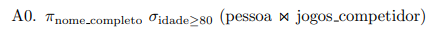

In [ ]:
query = """
select nome_completo
  from pessoa as p, jogos_competidor as j
  where p.id_pessoa = j.id_pessoa
  and j.idade >= 80
"""

df = pd.read_sql_query(query, conn)
df

,nome_completo
0,George Denholm Armour
1,Thomas Cowperthwait Eakins
2,Winslow Homer
3,Max Liebermann
4,Robert Tait McKenzie
5,Louis Tauzin
6,John Quincy Adams Ward


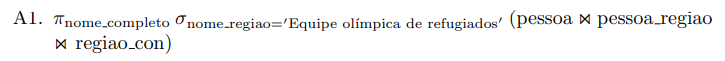

In [ ]:
query = """
select p.nome_completo
  from pessoa as p, pessoa_regiao as pr, regiao_con as rc
  where p.id_pessoa = pr.id_pessoa 
  and pr.id_regiao = rc.id_regiao 
  and rc.nome_regiao='Equipe olímpica de refugiados'
"""

df = pd.read_sql_query(query, conn)
df

,nome_completo
0,Paulo Amotun Lokoro
1,Rami Anis
2,Yiech Pur Biel
3,Mabika Yolande Bukasa
4,James Nyang Chiengjiek
5,Yonas Kinde
6,Anjelina Nadai Lohalith
7,Rose Nathike Lokonyen
8,Yusra Mardini
9,Popole Misenga


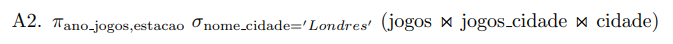

In [ ]:
query = """
select j.ano_jogos, j.estacao
  from jogos as j, jogos_cidade as jc, cidade as c
  where j.id_jogos = jc.id_jogos
  and jc.id_cidade = c.id_cidade
  and c.nome_cidade = 'Londres'  
"""

df = pd.read_sql_query(query, conn)
df

,ano_jogos,estacao
0,2012,Verão
1,1948,Verão
2,1908,Verão


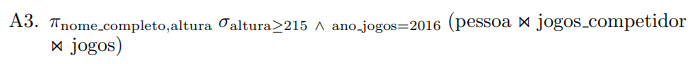

In [ ]:
query = """
select p.nome_completo, p.altura
  from pessoa as p, jogos_competidor as jc, jogos as j
  where p.id_pessoa = jc.id_pessoa and jc.id_jogos = j.id_jogos
  and p.altura >= 215 and j.ano_jogos=2016
"""

df = pd.read_sql_query(query, conn)
df

,nome_completo,altura
0,Pau Gasol Sez,215
1,Rudy Gobert-Bourgarel,215
2,Li Muhao,218
3,Zhou Qi,217


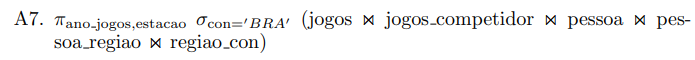

In [ ]:
query = """
select distinct j.ano_jogos, j.estacao
  from jogos as j, jogos_competidor as jc, pessoa as p, pessoa_regiao as pr, regiao_con as rc
  where j.id_jogos = jc.id_jogos and jc.id_pessoa = p.id_pessoa and p.id_pessoa = pr.id_pessoa
  and pr.id_regiao = rc.id_regiao
  and rc.con = 'BRA'
"""

df = pd.read_sql_query(query, conn)
df

,ano_jogos,estacao
0,1972,Verão
1,1976,Verão
2,2016,Verão
3,2004,Verão
4,1984,Verão
5,1988,Verão
6,2012,Verão
7,1952,Verão
8,1964,Verão
9,1980,Verão


**PARTE 2:**

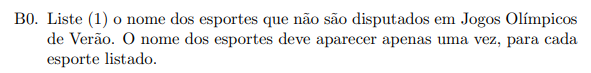

PEGAR TODOS OS ESPORTES DISPONIVEIS E SUBTRAIR OS PRESENTES EM JOGOS DE VERAO

In [ ]:
query = """
select distinct es.nome_esporte from
  jogos as j, jogos_competidor as jc, competidor_evento as ce, evento as ev, esporte as es
    where j.id_jogos = jc.id_jogos and jc.id_competidor = ce.id_competidor and ce.id_evento = ev.id_evento
    and ev.id_esporte = es.id_esporte and j.estacao!="Verão"
      order by es.nome_esporte
"""

df = pd.read_sql_query(query, conn)
df

,nome_esporte
0,Patinação de velocidade
1,Esqui Cross Country
2,Hóquei no Gelo
3,Biatlo
4,Esqui alpino
5,Luge
6,Bobsleigh
7,Patinação artística
8,Combinado Nórdico
9,Esqui Livre


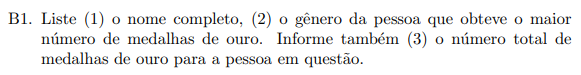

COMEÇAR FILTRANDO TODOS OS VENCEDORES DE MEDALHA DE OURO

In [ ]:
query = """
select p.nome_completo, p.genero, count(*) as num_medalha_ouro from
  pessoa as p natural join jogos_competidor as jc natural join competidor_evento as ce natural join medalha as m 
    where m.nome_medalha = 'Ouro'
      group by p.nome_completo, p.genero
        order by num_medalha_ouro desc
          limit 1
"""

df = pd.read_sql_query(query, conn)
df

,nome_completo,genero,num_medalha_ouro
0,"Michael Fred Phelps, II",M,23


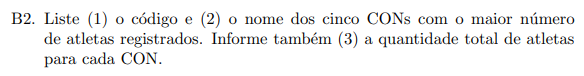

In [ ]:
query = """
select rc.con, rc.nome_regiao, count(*) as qt_pessoa from
  regiao_con as rc natural join pessoa_regiao as pr natural join pessoa as p
    group by rc.con, rc.nome_regiao
      order by qt_pessoa desc
        limit 5
"""

df = pd.read_sql_query(query, conn)
df

,con,nome_regiao,qt_pessoa
0,USA,Estados Unidos da América,9225
1,GBR,Reino Unido,5783
2,FRA,França,5198
3,GER,Alemanha,4763
4,CAN,Canadá,4657


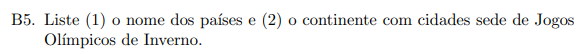

In [ ]:
query = """
select distinct c.nome_pais, c.nome_continente from
  cidade as c natural join jogos_cidade as jc natural join jogos as j
    where j.estacao = "Inverno"
"""

df = pd.read_sql_query(query, conn)
df

,nome_pais,nome_continente
0,Canadá,América do Norte
1,França,Europa
2,Noruega,Europa
3,Estados Unidos da América,América do Norte
4,Rússia,Europa
5,Japão,Ásia
6,Itália,Europa
7,Áustria,Europa
8,Iugoslávia,Europa
9,Suíça,Europa


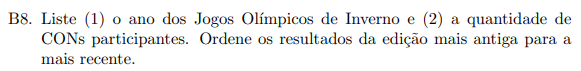

In [ ]:
query = """
select j.ano_jogos, count(distinct rc.con) as qt_con from
  jogos as j natural join jogos_competidor as jc natural join pessoa as p natural join pessoa_regiao as pr natural join regiao_con as rc
    where j.estacao = "Inverno"
      group by j.ano_jogos
        order by j.ano_jogos
      """

df = pd.read_sql_query(query, conn)
df

,ano_jogos,qt_con
0,1924,17
1,1928,25
2,1932,17
3,1936,28
4,1948,28
5,1952,30
6,1956,32
7,1960,32
8,1964,38
9,1968,38
